## Inference for Competition "Don't Overfit"

### 1. Import package

In [14]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

### 2. Data Analysis
This data analysis partly referenced a hot kernel of this competition on kaggle: [Tutorial on Esemble Learning](https://www.kaggle.com/mjbahmani/tutorial-on-ensemble-learning-don-t-overfit).

In [47]:
# import data
train_data = pd.read_csv("./Data/train.csv")
test_data = pd.read_csv("./Data/test.csv")

#### Label Distribution:

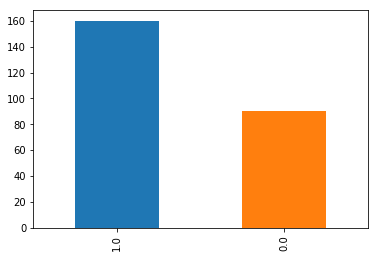

In [48]:
train_data['target'].value_counts().plot.bar()

Quite obvious class-imbalance can be spotted above, which means we might want to deal with this problem later.

#### Feature Distribution:
According to the evaluation results of the [kernel](https://www.kaggle.com/mjbahmani/tutorial-on-ensemble-learning-don-t-overfit) mentioned above, the distributions of almost all the feautures (even when they are mixed together) follow shapes similar to that of gaussian distribution. _It might make sense to compare the distributions of each feature based on their label (target). Considering that I have quite limited time for this game, I write down these sentences in Italian and it might remind me of that sometime later._

In [50]:
# split train/test data
from sklearn.model_selection import train_test_split
X = train_data.drop(["target","id"], axis=1)
Y = train_data["target"]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=0)
X_test = test_data.drop("id", axis=1)

### 3. Model Selection
The author of the [kernel](https://www.kaggle.com/mjbahmani/tutorial-on-ensemble-learning-don-t-overfit) listed above mentioned a category of ensemble models (techniques), but I kind of want to stop following his step and try some models I'm interested in. Of course bagging and boosting are something to try since they are so intuitive when talking about __"overfit"__. Additionally I might also try SVM, GD (gradient descent) and their variants. During the following paragraphs I'll discuss __(review)__ these algorithms or models one by one and try them out.

#### 1. Bagging, Boosting and Comparison
First of all, around 80% of all my (future) analysis would be based on or directly coming from the course [Machine Learning for Intelligent Systems](http://www.cs.cornell.edu/courses/cs4780/2018fa/) I took 2018 Fall provided by professor [Kilian Q. Weinberger](http://kilian.cs.cornell.edu/) at Cornell University; 50% of the remaining would be based on the course [Principles of Large Scale Machine Learning](http://www.cs.cornell.edu/courses/cs4780/2018fa/) I'm currently (2019 SP) enrolling in provided by professor Christopher De Sa at CU. I'm writing this because I don't want to have trouble about copyright or something(of course I will not).

##### Bagging
The goal of using bagging is usually reduce the __variance__ of a model, which generally means the error cause by dataset with limited representing capability of the whole distribution we assume our data have (which is in most cases true). In other words, variance exists because the model (classifier) is too "specialized" about the dataset we provide, which cause overfit.  
  
The intuition that Bagging will work is based on the __Weak Law of Large Numbers__, which generally says states that for i.i.d radom variables sampled from a certain distribution, as the number of these random variables approach infinity, their mean can be a good approximation of the estimation of this distribution.    

Based on this law, people try to "procude" as many as possible "datasets" to train as many as possible classifiers, so that the average of these classifers can be a good approximation of the ultimate model we are looking for. The way to produce many "datasets" is sampling (with replacement) from the only datasets we have.  
  
  Implement the most famous Bagging variant Random Forest Classifier:

In [73]:
from sklearn.ensemble import RandomForestClassifier as RandomForest

"""
as for model parameters, max depth is set to default, which you can also say
infinity because it will split until all leaves are pure, which overfits
hell. On the other hand, I'll try to have as many trees as possible.
The number of features to consider for each split is square root of the number
of all features.
"""
cls = RandomForest(n_estimators=100, max_features="sqrt")
cls.fit(X, Y)
y_pred = cls.predict(X_val)
print(classification_report(y_pred, Y_val))
print("Confusion Matrix:\n",confusion_matrix(y_pred, Y_val))
print("Accuracy: {}".format(accuracy_score(y_pred, Y_val)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00        31

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

Confusion Matrix:
 [[19  0]
 [ 0 31]]
Accuracy: 1.0


In [74]:
# create submission file
prediction = cls.predict(X_test)
result = pd.DataFrame(prediction, columns=["target"], dtype=int)
result.index = range(250,20000)
result.to_csv("./data/result.csv")